In [1]:
import os
import numpy as np
import tensorflow as tf

In [18]:
path_dataset = "dataset/"
paths = []
labels = []
images = []

for path, subdir, files in os.walk(path_dataset):
    for name in files:

        # masukkan path ke list paths
        path_name = os.path.join(path, name)
        paths.append(path_name)

        # masukkan label ke list labels
        label = name.split(' ')[0]
        labels.append(label)

        # masukkan nama file ke list images
        images.append(name)

len(paths)
labels[0]

'negative'

# Data Spliting

## Training Set

In [2]:
from tensorflow.keras.utils import image_dataset_from_directory

training = image_dataset_from_directory(
    "dataset/",
    labels="inferred",
    label_mode="categorical",
    class_names=["Negative", "Positive"],
    image_size=(227, 227),
    subset="training",
    validation_split=0.2,
    shuffle=True,
    seed=1,
    batch_size=None
)

Found 40000 files belonging to 2 classes.
Using 32000 files for training.


## Testing Set

In [3]:
validation = image_dataset_from_directory(
    "dataset/",
    labels="inferred",
    label_mode="categorical",
    class_names=["Negative", "Positive"],
    image_size=(227, 227),
    subset="validation",
    validation_split=0.2,
    shuffle=True,
    seed=1,
    batch_size=None
)


Found 40000 files belonging to 2 classes.
Using 8000 files for validation.


## Preview Gambar

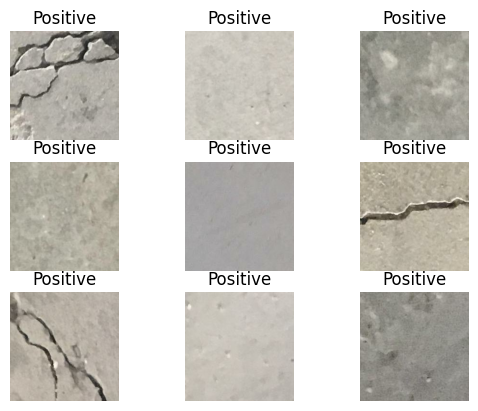

In [4]:
import matplotlib.pyplot as plt
i = 0

for image, label in training.take(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(image.numpy().astype("uint8"))
    if label.numpy()[0] == "1":
        plt.title("Negative")
    else:
        plt.title("Positive")

    plt.axis("off")

    i += 1

plt.show()

## ____________________________________________

### Convert to Array

In [5]:
training_images = []
training_labels = []


hitung = 0

for images, labels in training.take(2400):
    training_labels.append(labels.numpy())
    training_images.append(images.numpy())

testing_images = []
testing_labels = []

for images, labels in validation.take(600):
    testing_labels.append(labels.numpy())
    testing_images.append(images.numpy())

print(f"training\t: {len(training_images)}\
    \ntesting\t\t: {len(testing_images)}")

training	: 2400    
testing		: 600


## Shape

In [18]:
x_train_raw = np.array(training_images)
y_train = np.array(training_labels)
x_test_raw = np.array(testing_images)
y_test = np.array(testing_labels)

print(f"x_train_raw\t: {x_train_raw.shape}\
    \ny_train\t\t: {y_train.shape}\
    \nx_test_raw\t: {x_test_raw.shape}\
    \ny_test\t\t: {y_test.shape}")

x_train_raw	: (2400, 227, 227, 3)    
y_train	: (2400, 2)    
x_test_raw	: (600, 227, 227, 3)    
y_test	: (600, 2)


## Konversi 227x227 ke vektor 154587x1

In [9]:
x_train = x_train_raw.reshape(2400, 154587)
x_test = x_test_raw.reshape(600, 154587)

print(f"x_train\t: {x_train.shape}\
    \nx_test\t: {x_test.shape}")


x_train	: (2400, 154587)    
x_test	: (600, 154587)


### Normalisasi pixel pada gambar

In [25]:
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

In [22]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(512, activation="relu", input_dim=154587),
    Dense(128, activation="relu"),
    Dense(32, activation="relu"),
    Dense(2, activation="sigmoid")  # ada 4 kelas
])


In [23]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.binary_crossentropy,
    metrics=["accuracy"]
)


In [24]:
# model.fit(
#     x_train, y_train,
#     epochs=20,
#     batch_size=128,
#     verbose=1,
#     validation_data=(x_test, y_test),
# )


Epoch 1/20
15/19 [======================>.......] - ETA: 3s - loss: 0.6954 - accuracy: 0.5286

KeyboardInterrupt: 